In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## Задача №2

In [ ]:
#1)

In [321]:
#Загрузим из библиотеки stats функцию равномерного распределения
uniform = stats.uniform()

In [160]:
#Найдём дисперсию и матожидание нашего рспределения
var = uniform.var()
mean = uniform.mean()
print('дисперсия = ', var)
print('среднее =', mean)

дисперсия =  0.0833333333333
среднее = 0.5


In [159]:
#Найдёи точки теоретической плотность нашей выборки
lin = np.linspace(0, 1, 1000)
theory = uniform.pdf(lin)

In [161]:
#Найдём точки фактического распределения
sam = uniform.rvs(size = 1000)

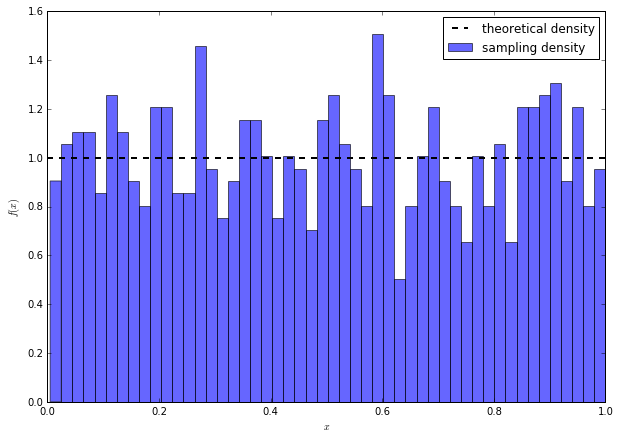

In [162]:
#нарисуем то что получилось
plt.figure(figsize=[10,7])
plt.hist(sam, bins=50, alpha=0.6, normed=True, label='sampling density', color=(0, 0, 1))
plt.plot(lin, theory, '--', label='theoretical density', linewidth = 2, alpha=1, color=(0, 0, 0))
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

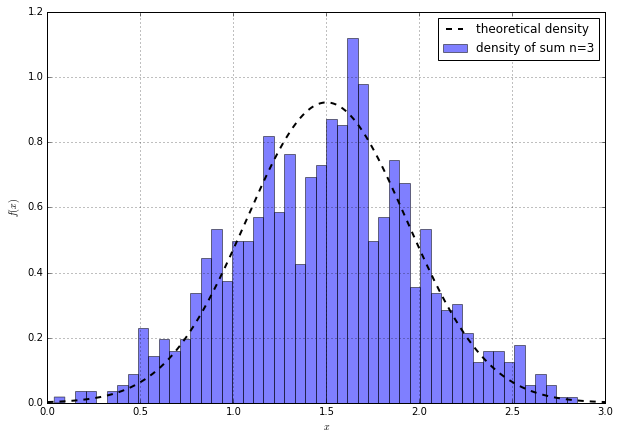

In [391]:
#Сдесь и далее нарисуем плотности для сумм n = 3, 10, 50 наших случайных величин. Так же, используя ЦПТ, добавим на эти 
#гистограммы теоретическую плотность
s = np.array([sum(uniform.rvs(size=3)) for _ in range(0, 1000)])
theory = stats.norm.pdf(np.linspace(0, 3, 1000), loc = 1.5, scale = np.sqrt(3*var))
lin = np.linspace(0, 3, num=1000)

plt.figure(figsize=[10,7])
plt.hist(s, normed=True, bins=50, alpha=0.5, label='density of sum n=3', color=(0, 0, 1))
plt.grid(True)
plt.xlim([0,3])
plt.plot(lin, theory, '--', label='theoretical density', linewidth = 2, alpha=1, color = (0, 0, 0))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

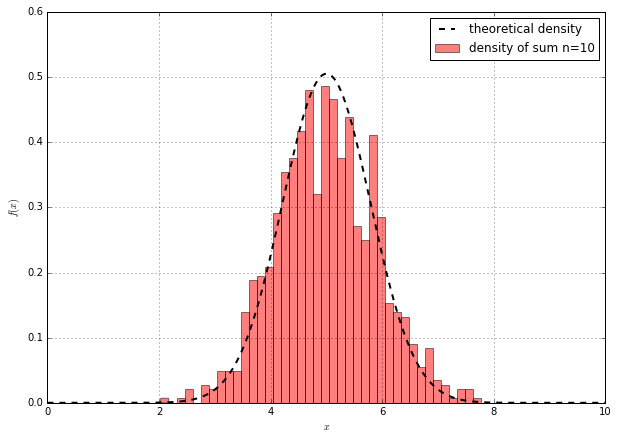

In [392]:
s = np.array([sum(uniform.rvs(size=10)) for _ in range(0, 1000)])
theory = stats.norm.pdf(np.linspace(0, 10, 1000), loc = 5, scale = np.sqrt(var*10))
lin = np.linspace(0, 10, num=1000)

plt.figure(figsize=[10,7])
plt.hist(s, normed=True, bins=40, alpha=0.5, label='density of sum n=10', color=(1, 0, 0))
plt.grid(True)
plt.xlim([0,10])
plt.plot(lin, theory, '--', label='theoretical density', linewidth = 2, alpha=1, color = (0, 0, 0))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

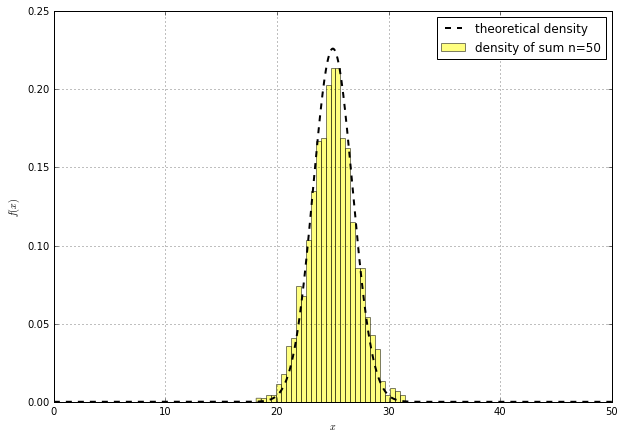

In [412]:
s = np.array([sum(uniform.rvs(size=50)) for _ in range(0, 1000)])
theory = stats.norm.pdf(np.linspace(0, 50, 1000), loc = 25, scale = np.sqrt(var*50))
lin = np.linspace(0, 50, num=1000)

plt.figure(figsize=[10,7])
plt.hist(s, normed=True, bins=30, alpha=0.5, label='density of sum n=50', color=(1, 1, 0))
plt.grid(True)
plt.xlim([0,50])
plt.plot(lin, theory, '--', label='theoretical density', linewidth = 2, alpha=1, color = (0, 0, 0))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

In [ ]:
#Как видим при n = 50 наше распределения достаточно близко к теоретическому, что и следует из ЦПТ

In [411]:
#2)

In [152]:
#Найдём распределение суммы 3 случайно сгенерированных случайных величин с равномерным распределением
s = np.array([sum(uniform.rvs(size=3)) for _ in range(0, 1000)])

In [153]:
#Найдём примерную вероятность того что эта сумма больше 2
k = 0
for i in range(len(s)):
    if s[i] > 2:
        k = k+1
p = k/1000
print(p)

0.159


In [ ]:
#3)

In [184]:
#найдём среднее случайной величины Х1^5
mean = sum(uniform.rvs(size = 1000)**5)/1000
mean

0.16890775420397106

In [194]:
#найдём дисперсию X1/(1+X2^2)
X1 = uniform.rvs(size = 1000)
X2 = uniform.rvs(size = 1000)

In [197]:
X = X1/(1 + X2**2)

In [202]:
var = sum(X**2)/1000 - (sum(X)/1000)**2
var

0.062290464474788254

In [203]:
#4)

In [204]:
#найдём медиану и 25% квантиль распределения (1 + X1)/(3 + X2)
X1 = uniform.rvs(size = 1000)
X2 = uniform.rvs(size = 1000)

In [205]:
X = (1 + X1)/(3 + X2)

In [207]:
X.sort()

In [211]:
print('median =', (X[499] + X[500])/2)

median = 0.425384970154


In [212]:
print('25% quantile =', (X[249] + X[250])/2)

25% quantile = 0.357630026056


## Задача №3

Задача 58. Двигаемся вверх-вниз или влево-вправо по фрактальному множеству.
1. Вероятность когда либо дойти до точки А?
2. Вероятность вернуться в начало координат?
3. Вероятность дойти до точки А раньше, чем до Б?

Решал эту задачу из предположения, что речь идёт о фрактальном броуновском движении, а по скольку движение возможно в 4 направлениях, следовательно вероятность 1/4 пойти в каждом из них.

Пытаясь решить эту задачу математически, возникает множество проблем с бесконечными суммами, которые мне не удалось красиво свернуть. Поэтому я решил эту задачу через примерную оценку используя рекурентную функцию.

Напишем функцию, которая считает количество различных путей длины n, выходящих из точки с координатами (x1, y1), которые ни в какой момент времени не попадает в точку с координатами (х2, у2)

In [383]:
def f1(x1, y1, x2, y2, n):
    if (x1 == x2) and (y1 == y2) and n == 0:
        return 0
    elif n == 0:
        return 1
    elif (x1 == x2) and (y1 == y2):
        return 0
    elif abs(x2-x1)+abs(y2-y1) > 0:
        return 4**(n)
    else:
        return f(x1+1, y1, x2, y2, n-1) + f(x1, y1+1, x2, y2, n-1) + f(x1-1, y1, x2, y2, n-1) + f(x1, y1-1, x2, y2, n-1)            

Тогда вероятность того что мы из точки с координатами (0,0) когда нибудь попадём в точку А c координатами (х,у) будет равна: $P_A = \lim_{n \to \infty} 1 - \cfrac{f_1(0,0,x,y,n)}{4^n}$

Теперь найдём вероятность того, что мы когда-нибудь вернёмся в 0, по факту это значит, что мы должны найти вероятность когда либо сместиться на одну клетку обратно однажды выйдя из неё, эта вероятность можно найти по такой формуле: $P = \lim_{n \to \infty} 1 - \cfrac{f_1(0,0,0,1,n)}{4^n}$. К сожалению эта функция долго работает из-за быстрого роста, а оптимизация возможно только при высоком расстоянии между точками. Поэтому тут я могу себе позвролить взять только n = 15.
Найдём эту вероятность:

In [385]:
1 - f1(0, 0, 0, 1, 15)/4**15

0.4617127375677228

Почти наверное, учитывая тенденцию при увеличении n, этот пределел будет сходится к 0.5 в бесконечности.

Чтобы найти вероятность того что мы попадём в точку А раньше, чем до Б, нам нужно знать вероятность дойти до точки А не попав при этом в точку Б. Напишем функцию которая будет находить количество таких способов, где 
n - число шагов, 
(x1, y1) - координаты точки начала, 
(x2, y2) - координаты точки А,
(x3, y3) - координаты точки Б.

In [415]:
def f2(x1, y1, x2, y2, x3, y3, n):
    if (x1 == x2) and (y1 == y2) and n == 0:
        return 1
    elif n == 0:
        return 0
    elif (x1 == x2) and (y1 == y2):
        return 4^(n)
    elif (x1 == x3) and (y1 == y3):
        return 0
    elif abs(x2-x1)+abs(y2-y1) > 0:
        return 0
    else:
        return f(x1+1, y1, x2, y2, n-1) + f(x1, y1+1, x2, y2, n-1) + f(x1-1, y1, x2, y2, n-1) + f(x1, y1-1, x2, y2, n-1)    

тогда получаем конечную формулу: 

$$P_{A-B} = \lim_{n \to \infty} \cfrac{f2(0, 0, x_A, y_A, x_B, y_B, n)}{4^n}*\lim_{n \to \infty} 1 - \cfrac{f_1(x_A,y_A,x_B,y_B,n)}{4^n}
$$